### Importing all the libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

### Loading the dataset

In [2]:
dataset = pd.read_csv("C:/Users/Renick Andrews/Downloads/bank-full.csv")

### Size of the dataset

In [3]:
dataset.shape

(45211, 17)

### Attribute description

In [4]:
dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [5]:
dataset.head(10)

age           job   marital  education default  balance housing loan  \
0   58    management   married   tertiary      no     2143     yes   no   
1   44    technician    single  secondary      no       29     yes   no   
2   33  entrepreneur   married  secondary      no        2     yes  yes   
3   47   blue-collar   married    unknown      no     1506     yes   no   
4   33       unknown    single    unknown      no        1      no   no   
5   35    management   married   tertiary      no      231     yes   no   
6   28    management    single   tertiary      no      447     yes  yes   
7   42  entrepreneur  divorced   tertiary     yes        2     yes   no   
8   58       retired   married    primary      no      121     yes   no   
9   43    technician    single  secondary      no      593     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no  
5  unknown    5   may       139         1     -1         0  unknown     no  
6  unknown    5   may       217         1     -1         0  unknown     no  
7  unknown    5   may       380         1     -1         0  unknown     no  
8  unknown    5   may        50         1     -1         0  unknown     no  
9  unknown    5   may        55         1     -1         0  unknown     no

### Datatypes of the attributes

In [6]:
dataset.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

### Finding missing values of the dataset

In [7]:
dataset.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

#### <center>There are no  presence of missing values in the dataset 

### Five number summary of the dataset

In [8]:
dataset.describe().transpose()

count         mean          std     min    25%    50%     75%  \
age       45211.0    40.936210    10.618762    18.0   33.0   39.0    48.0   
balance   45211.0  1362.272058  3044.765829 -8019.0   72.0  448.0  1428.0   
day       45211.0    15.806419     8.322476     1.0    8.0   16.0    21.0   
duration  45211.0   258.163080   257.527812     0.0  103.0  180.0   319.0   
campaign  45211.0     2.763841     3.098021     1.0    1.0    2.0     3.0   
pdays     45211.0    40.197828   100.128746    -1.0   -1.0   -1.0    -1.0   
previous  45211.0     0.580323     2.303441     0.0    0.0    0.0     0.0   

               max  
age           95.0  
balance   102127.0  
day           31.0  
duration    4918.0  
campaign      63.0  
pdays        871.0  
previous     275.0

#### <center>There are negative values present in the pdays column of the dataset .Hence, we replace it to positive values


In [9]:
dataset.pdays=dataset.pdays.replace(-1,1)

In [10]:
dataset.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1      1         0  unknown     no  
1  unknown    5   may       151         1      1         0  unknown     no  
2  unknown    5   may        76         1      1         0  unknown     no  
3  unknown    5   may        92         1      1         0  unknown     no  
4  unknown    5   may       198         1      1         0  unknown     no

### Visualizing the presence of outliers in the dataset 

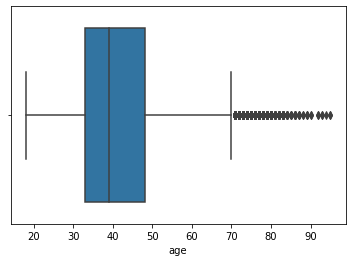

In [11]:
sns.boxplot(dataset['age'])

#### <center>There are clients over 70 and there they are outliers.

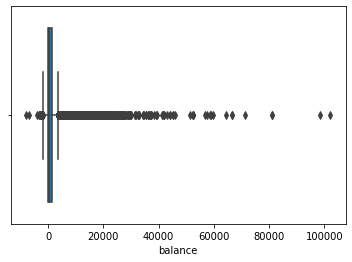

In [12]:
sns.boxplot(dataset['balance'])

#### <center>The balance column is very widely distributed having few clients with a balance of more than 5000 Rupees.

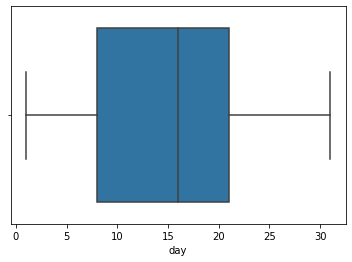

In [13]:
sns.boxplot(dataset['day'])

#### <center>There are no outliers the day column.

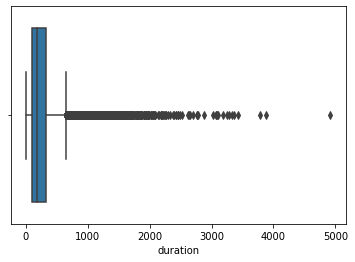

In [14]:
sns.boxplot(dataset['duration'])

#### <center>There are few outliers in this column whose duration goes more than 1000.

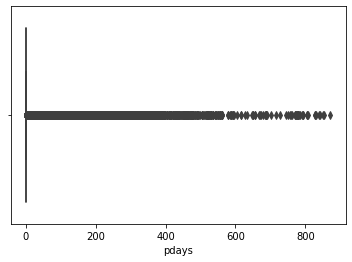

In [15]:
sns.boxplot(dataset['pdays'])

#### <center>There are outliers in the pdays column having values more than 500

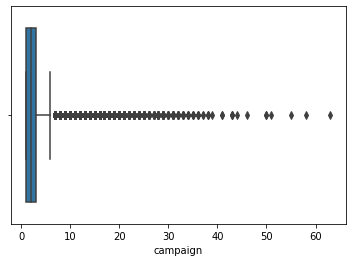

In [16]:
sns.boxplot(dataset['campaign'])

#### <center>There are a very few contacts who performed during the campaign although there are contacts who performed.

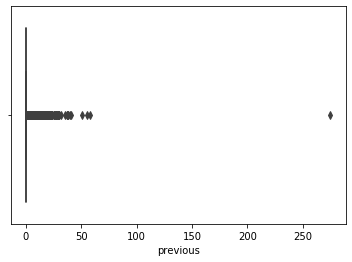

In [17]:
sns.boxplot(dataset['previous'])

#### <center>There is only one contact performed previously and all others fall inside the scale .

### Checking the distribution of the dependent column

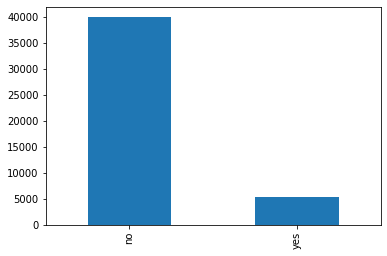

In [18]:
pd.value_counts(dataset["Target"]).plot(kind="bar")

In [19]:
dataset["Target"].value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: Target, dtype: float64

In [20]:
dataset.groupby(dataset["Target"]).count() 

age    job  marital  education  default  balance  housing   loan  \
Target                                                                       
no      39922  39922    39922      39922    39922    39922    39922  39922   
yes      5289   5289     5289       5289     5289     5289     5289   5289   

        contact    day  month  duration  campaign  pdays  previous  poutcome  
Target                                                                        
no        39922  39922  39922     39922     39922  39922     39922     39922  
yes        5289   5289   5289      5289      5289   5289      5289      5289

#### <center>The customers who  fall into the YES category are very less in number than those who told NO. YES clients range upto 5289 and NO clients count upto 39922.

### Converting object datatype to categorical for visualization.

In [21]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dataset['month'] = label.fit_transform(dataset['month'])
dataset['poutcome'] = label.fit_transform(dataset['poutcome'])
dataset['job'] = label.fit_transform(dataset['job'])
dataset['marital'] = label.fit_transform(dataset['marital'])
dataset['education'] = label.fit_transform(dataset['education'])
dataset['default'] = label.fit_transform(dataset['default'])
dataset['contact'] = label.fit_transform(dataset['contact'])
dataset['housing'] = label.fit_transform(dataset['housing'])
dataset['loan'] = label.fit_transform(dataset['loan'])
dataset['Target'] = label.fit_transform(dataset['Target'])

### Checking the relationship between data using pairplot.

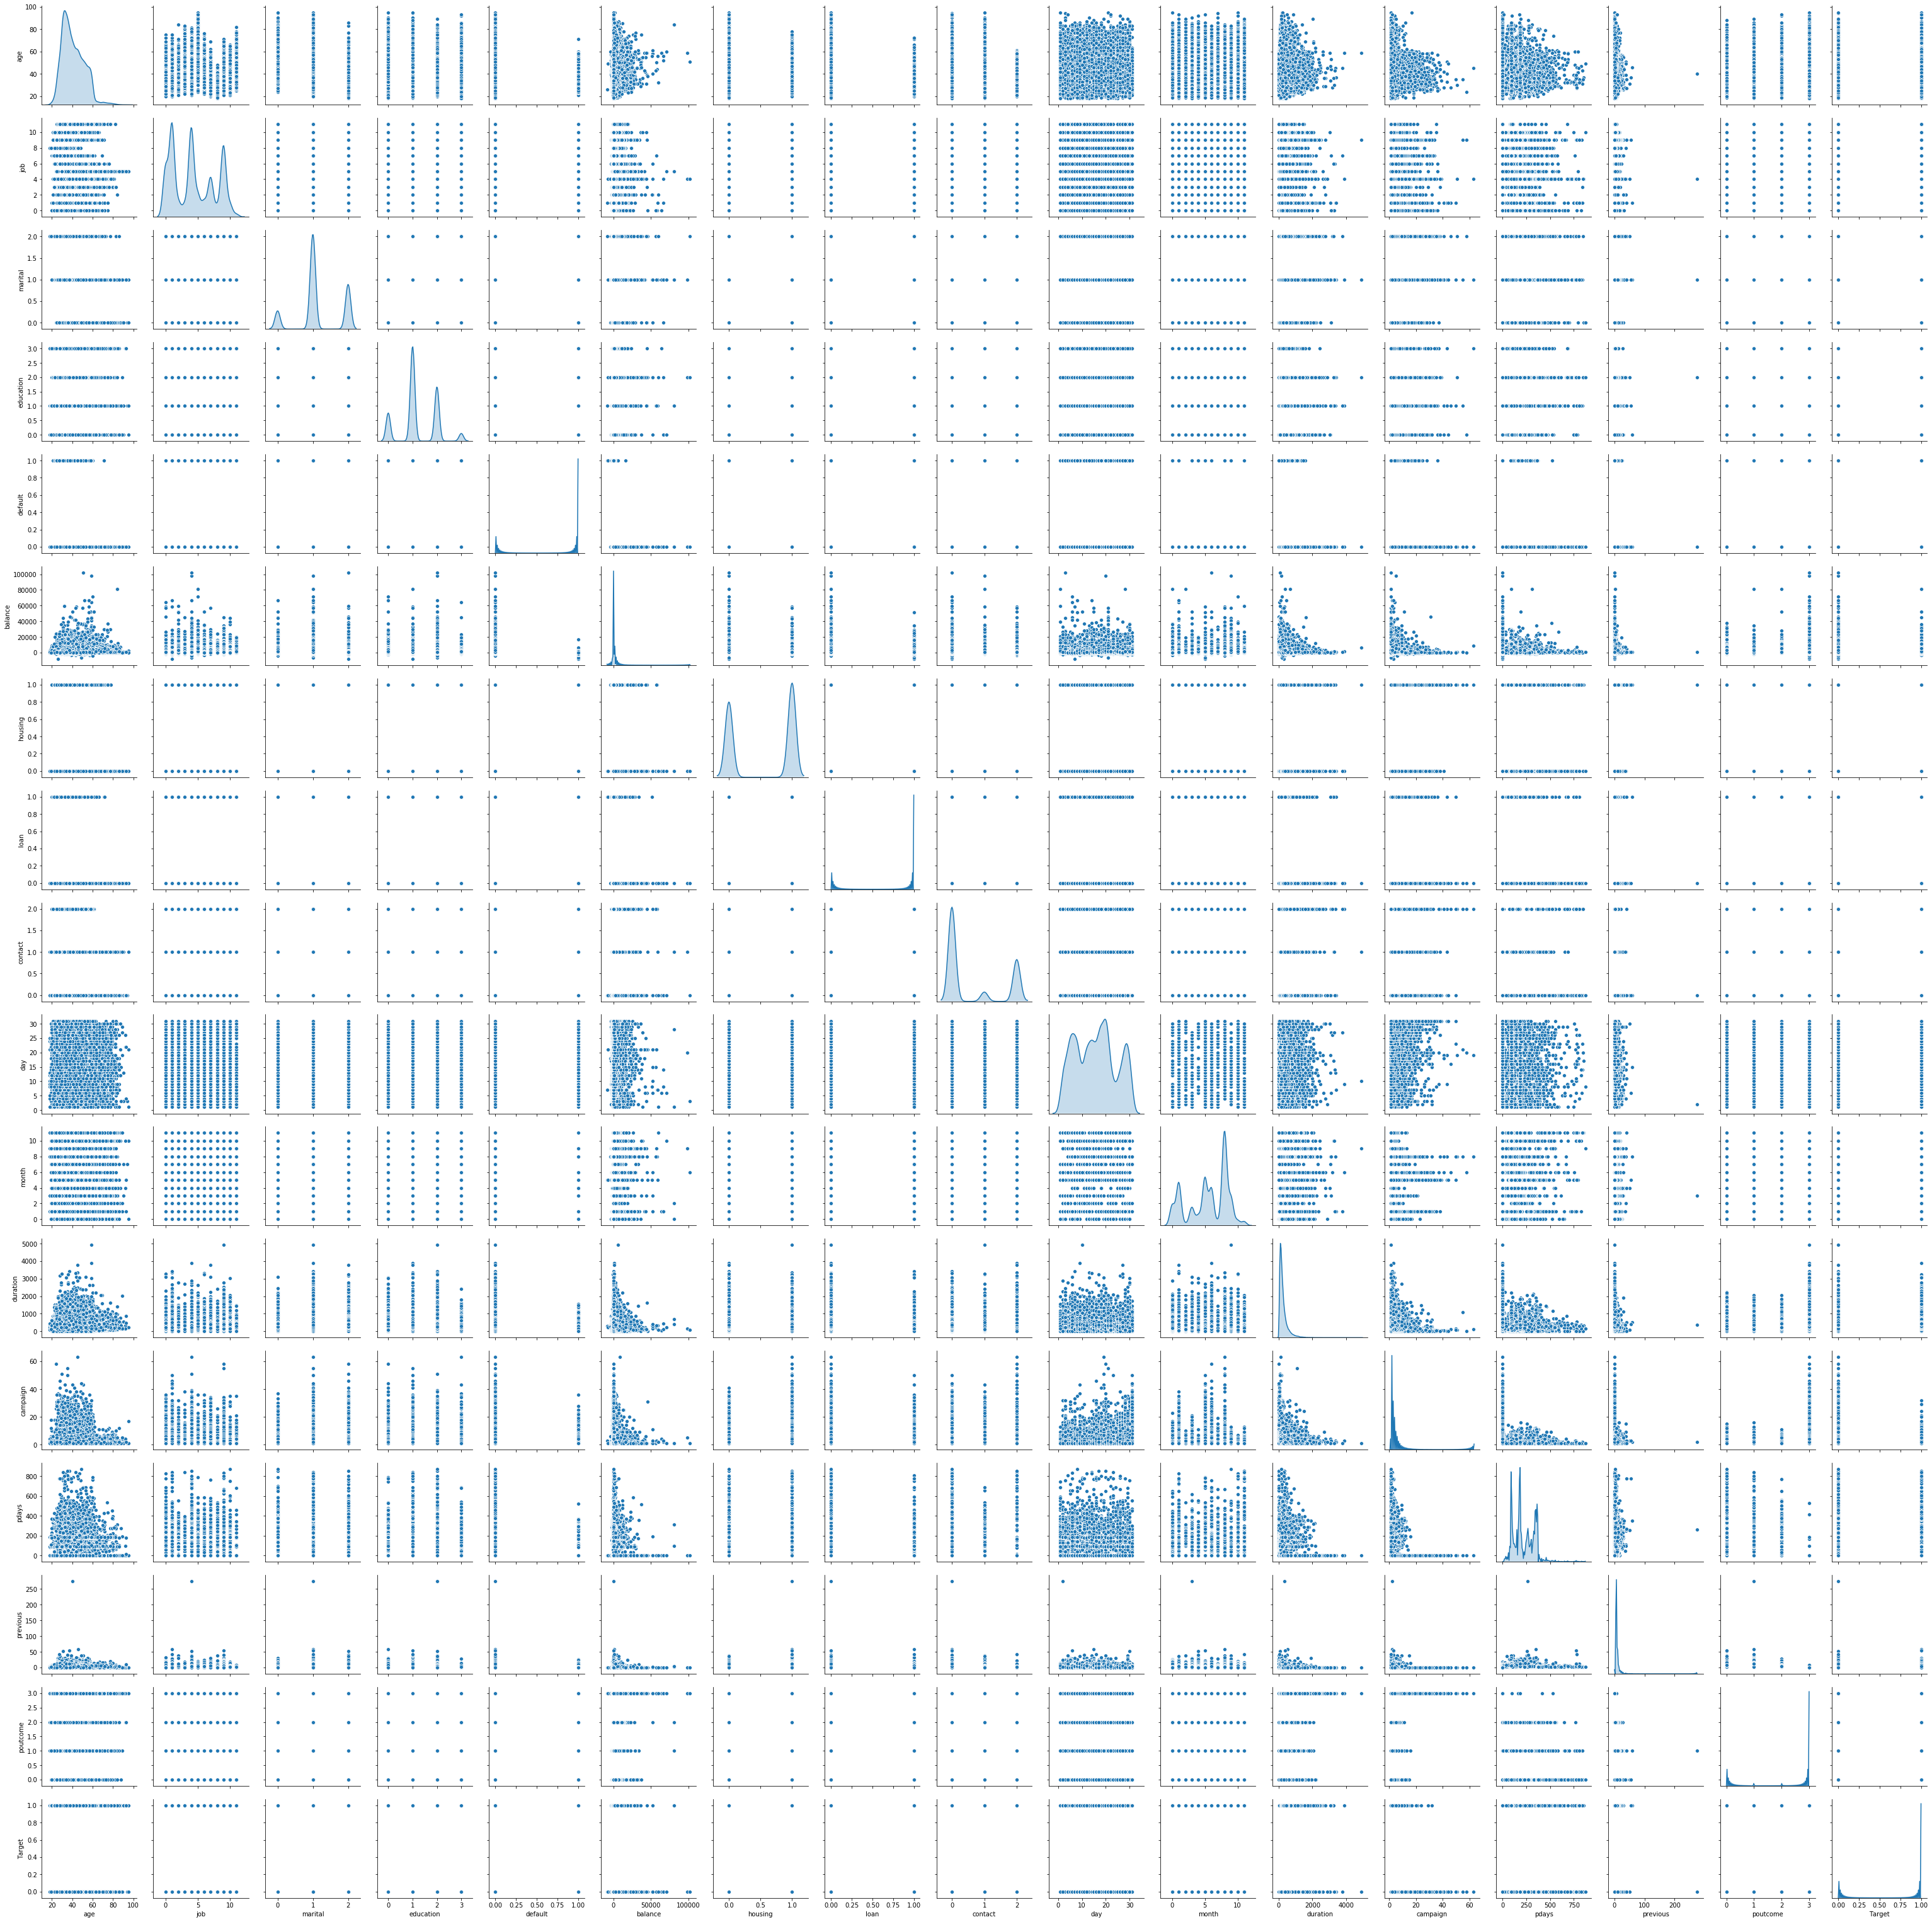

In [22]:
sns.pairplot(dataset, diag_kind="kde")

#### <center>There is no strong realtionship between the target and any of the independent variables.Though we can say that the duration column has a slight impact on the target column.

### Check the correlation of different datatypes using Heatmap.


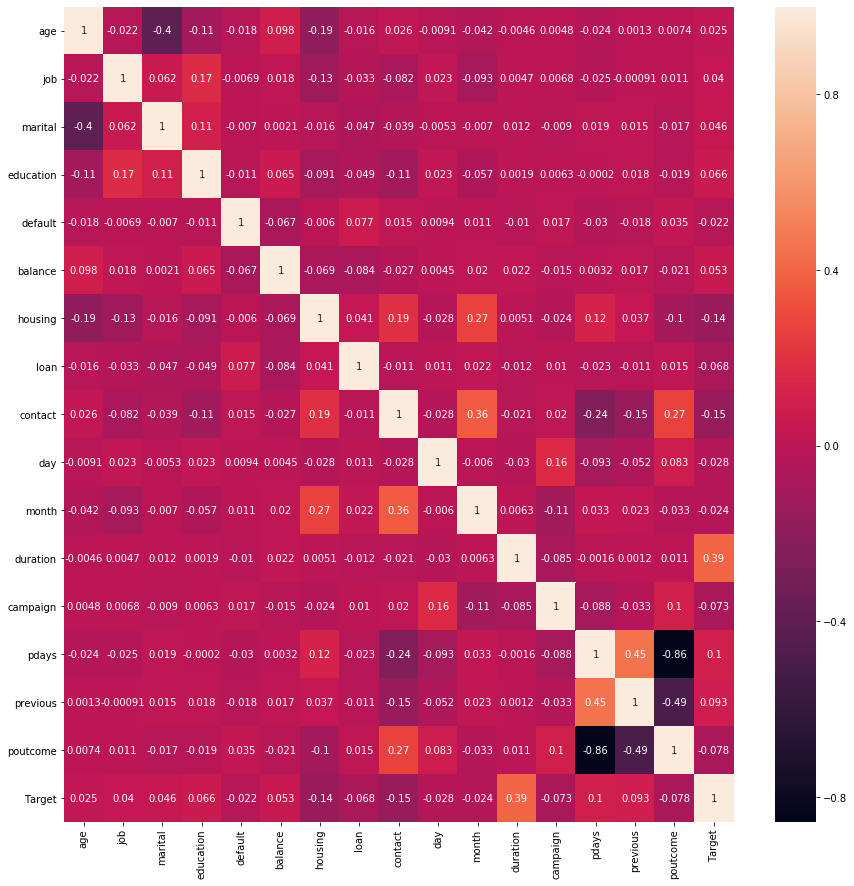

In [23]:
plt.figure(figsize=(15,15))
sns.heatmap(dataset.corr(),annot=True)

#### <center>There is no strong correlation betwwen two variables.<br>The pdays column and the previous column are midly correlated having the correlation value of 0.45.<br> The target column and the duration column are midly correlated having the correlation value of 0.39.<br> The month column and the housingcolumn are slightly correlated having the correlation value of 0.27.

### Creation of a dataframe dataframe.


In [22]:
dataframe = pd.DataFrame(dataset)
dataframe.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  Target  
0    5      8       261         1      1         0         3       0  
1    5      8       151         1      1         0         3       0  
2    5      8        76         1      1         0         3       0  
3    5      8        92         1      1         0         3       0  
4    5      8       198         1      1         0         3       0

### Converting all the categories  into numbers which identify a particular  using labelencoder.


In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataframe['job'] = le.fit_transform(dataframe['job'])
dataframe['marital'] = le.fit_transform(dataframe['marital'])
dataframe['education'] = le.fit_transform(dataframe['education'])
dataframe['default'] = le.fit_transform(dataframe['default'])
dataframe['contact'] = le.fit_transform(dataframe['contact'])
dataframe['housing'] = le.fit_transform(dataframe['housing'])
dataframe['loan'] = le.fit_transform(dataframe['loan'])
dataframe['month'] = le.fit_transform(dataframe['month'])
dataframe['poutcome'] = le.fit_transform(dataframe['poutcome'])
dataframe['Target'] = le.fit_transform(dataframe['Target'])


In [24]:
dataframe.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  Target  
0    5      8       261         1      1         0         3       0  
1    5      8       151         1      1         0         3       0  
2    5      8        76         1      1         0         3       0  
3    5      8        92         1      1         0         3       0  
4    5      8       198         1      1         0         3       0

### Checking the datatypes after conversion.

In [25]:
dataframe.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
Target       int64
dtype: object

#### <center>All the columns are converted integer datatype but there are few columns which are categorical and each number represents a category in such columns.

### Converting the integer datatype to categorical datatype.

In [26]:
dataframe.job=dataframe.job.astype('category')
dataframe.education=dataframe.education.astype('category')
dataframe.marital=dataframe.marital.astype('category')
dataframe.default=dataframe.default.astype('category')
dataframe.contact=dataframe.contact.astype('category')
dataframe.housing=dataframe.housing.astype('category')
dataframe.loan=dataframe.loan.astype('category')
dataframe.month=dataframe.month.astype('category')
dataframe.poutcome=dataframe.poutcome.astype('category')
dataframe.Target=dataframe.Target.astype('category')

In [27]:
dataframe.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
Target       category
dtype: object

#### <center>Hence we can see that the datatypes have been converted.

### Standardizing the dataset columns using Standardscaler.

In [28]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

X_std = pd.DataFrame(StandardScaler().fit_transform(dataframe.values))
X_std.columns = dataframe.columns

### Separating the independent variables which is column 0 to column 16 and storing them in X array.<br> Storing the target variable which is column 17 in Y array

In [29]:
X_dataframe = dataframe.loc[:, dataframe.columns != 'Target']
y_dataframe = dataframe.loc[:, dataframe.columns == 'Target']

### Importing few other necessary libraries.

In [30]:
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

### Splitting the dataset into train and test.

In [31]:
features=X_dataframe.iloc[:, 0:16]
features_array = features.values   
target_labels = y_dataframe.values

X_train, X_test, y_train, y_test = model_selection.train_test_split(features_array, target_labels, test_size=0.3, random_state=1)
 

In [32]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(dataframe.index))*100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(dataframe.index))*100))

70.00% data is in training set
30.00% data is in test set


In [33]:
print(X_train.shape)
print(y_train.shape)

(31647, 16)
(31647, 1)


#### <center>The data is split into the ratio of 70:30.

### LOGISTIC REGRESSION MODEL

In [34]:
model = LogisticRegression()
model.fit(X_train, y_train)
model_score = model.score(X_test, y_test)
y_predict = model.predict(X_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))


C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8908876437629017
[[11763   250]
 [ 1230   321]]


#### <center>The confusion matrix :<br> Number of true positives = 11763<br>  Number of false negatives = 1230<br> Number of true negatives = 321<br>Number of false positives = 250<br><br> The number of correct predictions of identifing potential customers who are relatively more to subscribe term deposit  are high i.e., 11763 and,<br> The customers who would not subscribe but predicted they will are 250.<br> The customers who would not subscribe but predicted they will not are 321 , which is relatively less than the number of true positives.<br>The customers who would subscribe but predicted they will not are 1230.<br>


In [35]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     12013
           1       0.56      0.21      0.30      1551

    accuracy                           0.89     13564
   macro avg       0.73      0.59      0.62     13564
weighted avg       0.87      0.89      0.87     13564



#### <center>The accuracy of this model is 89%.<br> The precision of this model is 73%.<br> The recall of this model is 59%.

### NAIVE BAIYES MODEL

In [36]:
model = GaussianNB()
model.fit(X_train, y_train)

predictions=model.predict(X_test)
print(model_score)
print(metrics.confusion_matrix(y_test,predictions))

0.8908876437629017
[[10705  1308]
 [  850   701]]


C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### <center>The confusion matrix :<br> Number of true positives = 10705<br> Number of true negatives = 701<br>Number of false positives = 1308<br> Number of false negatives = 850<br><br> The number of correct predictions of identifing potential customers who are relatively more to subscribe term deposit  are high i.e., 11757 and,<br>The customers who would not subscribe and predicted they will not are 701, which is relatively less than the number of true positives<br>The customers who would not subscribe but predicted they will are 1308.<br> The customers who would subscribe but predicted they will not are 850.

In [37]:
expected = y_test
predicted = model.predict(X_test)

print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91     12013
           1       0.35      0.45      0.39      1551

    accuracy                           0.84     13564
   macro avg       0.64      0.67      0.65     13564
weighted avg       0.86      0.84      0.85     13564



#### <center> The accuracy of this model is 84%.<br> The precision of this model is 64%.<br> The recall of this model is 67%.

### KNN MODEL


In [38]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance')
NNH.fit(X_train, y_train)

C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [39]:
predicted_labels = NNH.predict(X_test)

In [40]:
print(model_score)
print(metrics.confusion_matrix(y_test, predicted_labels))

0.8908876437629017
[[11430   583]
 [ 1086   465]]


#### <center>Number of true positives = 11430<br> Number of true negatives = 465<br> Number of false positives = 583<br> Number of false negatives = 1086

#### <center>The number of correct predictions of identifing potential customers who are relatively more to subscribe term deposit  are high i.e., 11430 and,<br> The customers who would not subscribe but predicted they will not are 465 , which is relatively less than the number of true positives.<br> The customers who would not subscribe but predicted they will are 583.<br> The customers who would subscribe but predicted they will not are 1086.


In [41]:
print(metrics.classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93     12013
           1       0.44      0.30      0.36      1551

    accuracy                           0.88     13564
   macro avg       0.68      0.63      0.64     13564
weighted avg       0.86      0.88      0.87     13564



#### <center>The accuracy of this model is 88%.<br> The precision of this model is 68%.<br>The recall of this model is 63%.

#### <center>After observing the performance of all the models, the  logistic regression model is the best model because the accuracy,precision,recall,f1-score and the confusion matrix give out better values than the naive bayes and the knn models.

### Building the Ensemble models.

### Building a decision tree usingthe GINI criterion.

In [42]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [43]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))


1.0
0.8700973164258331


####  <center>Perfomance on training data using gini criterion = 100%.<br> Perfomance on test data using gini criterion = 87.00%.

### Building a decision tree using the ENTROPY criterion.

In [44]:
model_entropy=DecisionTreeClassifier(criterion='entropy')

In [45]:
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [46]:
print(model_entropy.score(X_train, y_train))
print(model_entropy.score(X_test, y_test))

1.0
0.8772485992332645


####  <center>Perfomance on training data using gini criterion = 100%.<br> Perfomance on test data using gini criterion = 87.76%.

#### <center>The Entropy Criteria is better to evaluate the Decision tree because its perfomance on the test data is little better than that of the Gini Criteria. 

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from sklearn import tree
from os import system
import pydotplus 
import graphviz

C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


### Visualizing the decision tree.

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_dataframe, y_dataframe, test_size=.30, random_state=1) 
train_char_label = ['No', 'Yes']
dataframe_Tree_File = open('df_tree.dot','w')
dot_data = tree.export_graphviz(model_entropy, out_file=dataframe_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
dataframe_Tree_File.close()

##### <center>Hyper Key Parameters: <br>model_entropy- The best criteria out of gini and entropy <br> out_file- The output file, which we initialized before <br> (Optional) <br>feature_names- list of strings <br> class_names- labels- we made it Yes and No

### Checking if there is a error while we output the tree 

In [50]:
retCode = system("dot -Tpng df_tree.dot -o df_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("df_tree.png"))

### Regularization (REDUCING OVER FITTING)

In [51]:
dTree = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTree.fit(X_train, y_train)
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

0.8909849274812779
0.8908876437629017


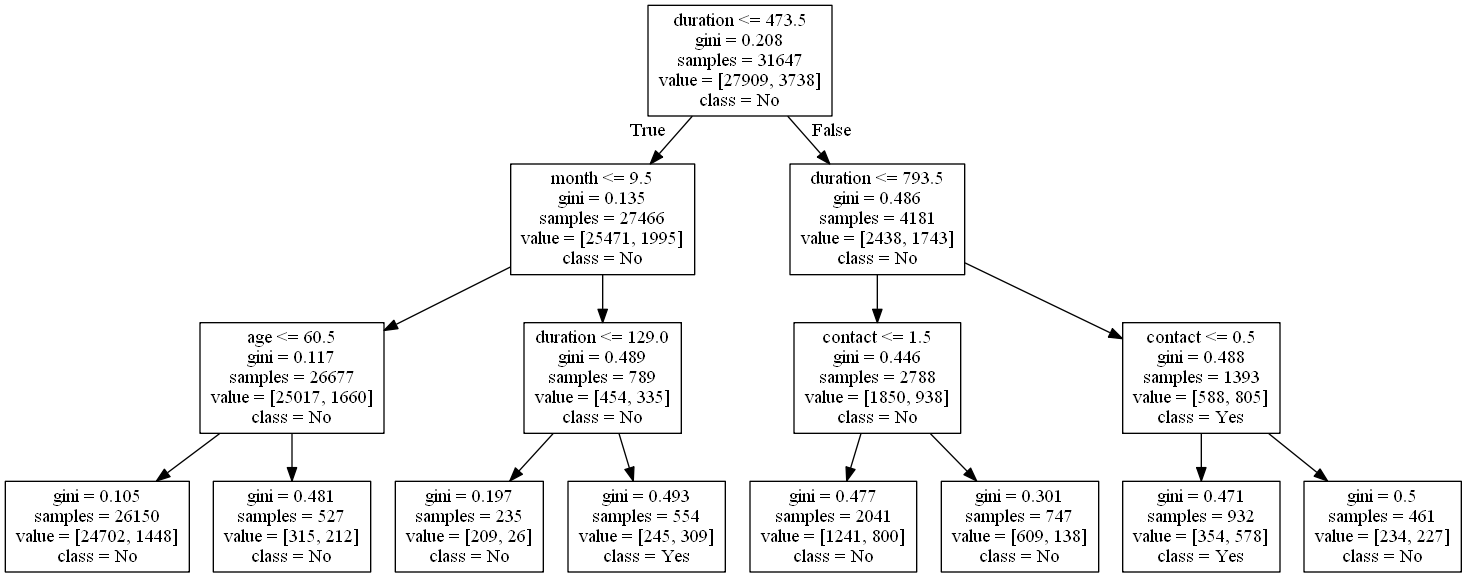

In [52]:
train_char_label = ['No', 'Yes']
df_Tree_File = open('df_treeR.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=df_Tree_File, feature_names = list(X_dataframe), class_names = list(train_char_label))
df_Tree_File.close()

retCode = system("dot -Tpng df_treeR.dot -o df_treeR.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("df_treeR.png"))

In [53]:
print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_dataframe.columns))

                Imp
age        0.087749
job        0.000000
marital    0.000000
education  0.000000
default    0.000000
balance    0.000000
housing    0.000000
loan       0.000000
contact    0.040253
day        0.000000
month      0.142030
duration   0.729968
campaign   0.000000
pdays      0.000000
previous   0.000000
poutcome   0.000000


### To check the score and print the heatmap

0.8908876437629017


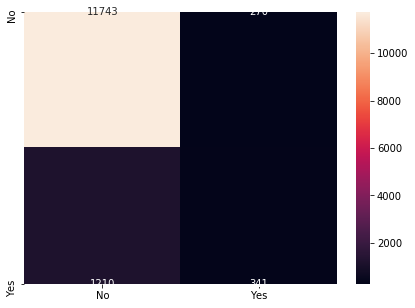

In [55]:
print(dTree.score(X_test , y_test))
y_predict = dTree.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

### Ensemble Learning - Bagging

In [56]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8927307578885284


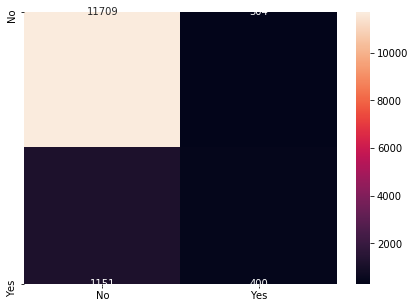

In [57]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

#### <br><center> Note: n_estimators= 50 gives the best result.

### Ensemble Learning - AdaBoosting

In [58]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=50, random_state=1)
abcl = abcl.fit(X_train, y_train)

C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8984812739604836


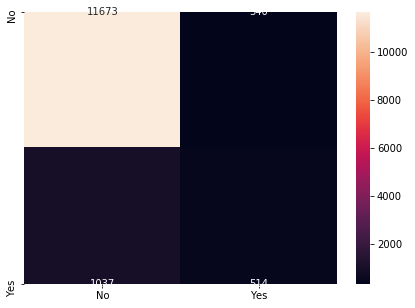

In [59]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


### Ensemble Learning - GradientBoost

In [60]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9004718372161604


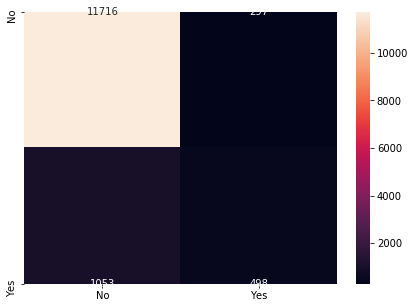

In [61]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

### Ensemble RandomForest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)


C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.9075493954585668


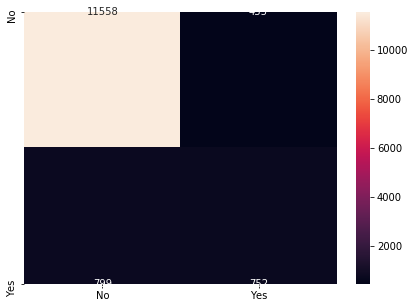

In [63]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

#### <center> Random Forest ,this is only used for Decision trees, and this gives a score of 90.75%. This is the best among everything. 